# Transformer

```{note}
本节我们整合 Encoder 和 Decoder 完成 Transformer 最后的拼接。
```

![](../images/attention/transformer.svg)

## 训练

In [1]:
import torch
from torch import nn
import d2l
import math

# 载入数据
batch_size, num_steps = 64, 10
train_iter, src_vocab, tgt_vocab = d2l.load_data_nmt(batch_size, num_steps)

In [2]:
# 一些参数
num_hiddens, num_layers, dropout = 32, 2, 0.1
ffn_num_hiddens, num_heads = 64, 4
norm_shape = [32]
lr, num_epochs, device = 0.005, 100, d2l.try_gpu()

# 创建模型
encoder = d2l.TransformerEncoder(len(src_vocab), num_hiddens, norm_shape,
                                 ffn_num_hiddens, num_heads, num_layers, dropout)
decoder = d2l.TransformerDecoder(len(tgt_vocab), num_hiddens, norm_shape,
                                 ffn_num_hiddens, num_heads, num_layers, dropout)
net = d2l.EncoderDecoder(encoder, decoder)

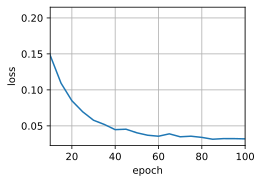

In [3]:
# 训练
d2l.train_nmt(net, train_iter, lr, num_epochs, tgt_vocab)

## 预测

预测时，我们没有真实的输出序列，解码器当前时间步的输入都将来自于前一时间步的输出词元。<br>
出现`<eos>`即停止预测。

我们可以通过与真实标签序列做比较来评估预测序列。

用 $p_{n}$ 表示 $n$元语法的精确度，它是两个数量的比值，分子是预测序列与标签序列中匹配的 $n$元语法的数量，分母是预测序列中 $n$元语法的数量。

那么, BLEU 的定义是:

$$\exp\left(\min\left(0, 1 - \frac{\mathrm{len}_{\text{label}}}{\mathrm{len}_{\text{pred}}}\right)\right)\prod_{i=1}^{k}p_{n}^{1/{2^{n}}}$$

其中 $k$ 是用于匹配的最长 $n$元语法，指数项用于惩罚较短的预测序列。

In [4]:
engs = ['go .', "i lost .", 'he\'s calm .', 'i\'m home .']
fras = ['va !', 'j\'ai perdu .', 'il est calme .', 'je suis chez moi .']

# 预测并使用BLEU评估
for eng, fra in zip(engs, fras):
    translation = d2l.predict_nmt(net, eng, src_vocab, tgt_vocab, num_steps)
    print(f'{eng} => {translation}, bleu {d2l.bleu(translation, fra, k=2):.3f}')

go . => va !, bleu 1.000
i lost . => j'ai perdu ., bleu 1.000
he's calm . => il est calme ., bleu 1.000
i'm home . => je suis chez moi ., bleu 1.000
